In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords, ALL_TIMES,interpline, CoordPair, xy_to_ll, ll_to_xy)
import pandas as pd
import numpy as np
import os
import shutil
import re
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.ticker as mticker
import cartopy.crs as ccrs                                               
import cartopy.feature as cf
import matplotlib.pyplot as plt
import glob
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import shapefile
import geopandas as gpd
from matplotlib.backends.backend_pdf import PdfPages
from palettable.lightbartlein.diverging import BlueDarkRed18_18

# information

In [2]:
ds_lu_2010s = xr.open_dataset('wrfout_d04_2011-06-23_11:00:00')
lu_2010s = ds_lu_2010s['LU_INDEX']

lu_2010s = lu_2010s[0,:,:]

In [3]:
ds_lu_2040s = xr.open_dataset('wrfout_d04_2040-06-18_23:00:00')
lu_2040s = ds_lu_2040s['LU_INDEX']

lu_2040s = lu_2040s[0,:,:]

# csv to xarray

2010s

In [4]:
HDF_1120 = pd.read_csv('HDF_1120_withgrids.csv')

HDF_1120 = HDF_1120.replace(9999,np.nan)

In [5]:
HDF_1120['hdf'].mean()

55.869120576795574

In [7]:
HDF_1120[HDF_1120['hdf']>=0].count()

XLAT           21082
XLONG          21082
hdf            21082
south_north    21082
west_east      21082
dtype: int64

In [9]:
HDF_1120[HDF_1120['hdf']>=90].count()

XLAT           2097
XLONG          2097
hdf            2097
south_north    2097
west_east      2097
dtype: int64

In [10]:
HDF_1120[HDF_1120['hdf']>=110].count()

XLAT           0
XLONG          0
hdf            0
south_north    0
west_east      0
dtype: int64

In [11]:
HDF_1120.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

HDF_1120_values = HDF_1120.hdf.values 
HDF_1120_values = HDF_1120_values.reshape(162,213)

XLAT = lu_2010s.XLAT
XLONG = lu_2010s.XLONG
south_north = lu_2010s.south_north
west_east = lu_2010s.west_east

In [12]:
HDF_1120_xr = xr.DataArray(HDF_1120_values,
                           dims=["south_north","west_east"],
                           coords=dict(
                           XLONG=(["south_north", "west_east"], XLONG),
                           XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp245_2010s = xr.Dataset({'ssp245_HDF_1120': HDF_1120_xr})

2040s

In [13]:
HDF_4049 = pd.read_csv('HDF_4049_withgrids.csv')

HDF_4049 = HDF_4049.replace(9999,np.nan)

In [14]:
HDF_4049['hdf'].mean()

70.4419295166721

In [16]:
HDF_4049[HDF_4049['hdf']>=0].count()

XLAT           21083
XLONG          21083
hdf            21083
south_north    21083
west_east      21083
dtype: int64

In [18]:
HDF_4049[HDF_4049['hdf']>=90].count()

XLAT           8688
XLONG          8688
hdf            8688
south_north    8688
west_east      8688
dtype: int64

In [19]:
HDF_4049[HDF_4049['hdf']>=110].count()

XLAT           0
XLONG          0
hdf            0
south_north    0
west_east      0
dtype: int64

In [20]:
HDF_4049.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

HDF_4049_values = HDF_4049.hdf.values 
HDF_4049_values = HDF_4049_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [21]:
HDF_4049_xr = xr.DataArray(HDF_4049_values,
                           dims=["south_north","west_east"],
                           coords=dict(
                           XLONG=(["south_north", "west_east"], XLONG),
                           XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp245_2040s = xr.Dataset({'ssp245_HDF_4049': HDF_4049_xr})

2090s

In [22]:
HDF_9099 = pd.read_csv('HDF_9099_withgrids.csv')

HDF_9099 = HDF_9099.replace(9999,np.nan)

In [23]:
HDF_9099['hdf'].mean()

84.54024095242617

In [24]:
HDF_9099[HDF_9099['hdf']>=0].count()

XLAT           21083
XLONG          21083
hdf            21083
south_north    21083
west_east      21083
dtype: int64

In [26]:
HDF_9099[HDF_9099['hdf']>=90].count()

XLAT           13480
XLONG          13480
hdf            13480
south_north    13480
west_east      13480
dtype: int64

In [27]:
HDF_9099[HDF_9099['hdf']>=112].count()

XLAT           132
XLONG          132
hdf            132
south_north    132
west_east      132
dtype: int64

In [28]:
HDF_9099.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

HDF_9099_values = HDF_9099.hdf.values 
HDF_9099_values = HDF_9099_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [29]:
HDF_9099_xr = xr.DataArray(HDF_9099_values,
                           dims=["south_north","west_east"],
                           coords=dict(
                           XLONG=(["south_north", "west_east"], XLONG),
                           XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp245_2090s = xr.Dataset({'ssp245_HDF_9099': HDF_9099_xr})

2040s_diff

In [30]:
diff_HDF_4049 = pd.read_csv('HDF_diff_2040s.csv')

diff_HDF_4049 = diff_HDF_4049.replace(9999,np.nan)

In [35]:
diff_HDF_4049 = diff_HDF_4049.reset_index(drop=True)

In [37]:
diff_HDF_4049.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

diff_HDF_4049_values = diff_HDF_4049['diff'].values 
diff_HDF_4049_values = diff_HDF_4049_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [38]:
diff_HDF_4049_xr = xr.DataArray(diff_HDF_4049_values,
                           dims=["south_north","west_east"],
                           coords=dict(
                           XLONG=(["south_north", "west_east"], XLONG),
                           XLAT=(["south_north", "west_east"], XLAT)))

ds_diff_ssp245_2040s = xr.Dataset({'diff_ssp245_HDF_4049': diff_HDF_4049_xr})

2090s_diff

In [39]:
diff_HDF_9099 = pd.read_csv('diff/HDF_diff_2090s.csv')

diff_HDF_9099 = diff_HDF_9099.replace(9999,np.nan)

In [43]:
diff_HDF_9099 = diff_HDF_9099.reset_index(drop=True)

In [44]:
diff_HDF_9099.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

diff_HDF_9099_values = diff_HDF_9099['diff'].values 
diff_HDF_9099_values = diff_HDF_9099_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [45]:
diff_HDF_9099_xr = xr.DataArray(diff_HDF_9099_values,
                           dims=["south_north","west_east"],
                           coords=dict(
                           XLONG=(["south_north", "west_east"], XLONG),
                           XLAT=(["south_north", "west_east"], XLAT)))

ds_diff_ssp245_2090s = xr.Dataset({'diff_ssp245_HDF_9099': diff_HDF_9099_xr})

# plot

In [46]:
PRD = gpd.read_file('/home/zzuoaa/evaluation_CMIP6/May/fine_coastline/china_coastline.shp')

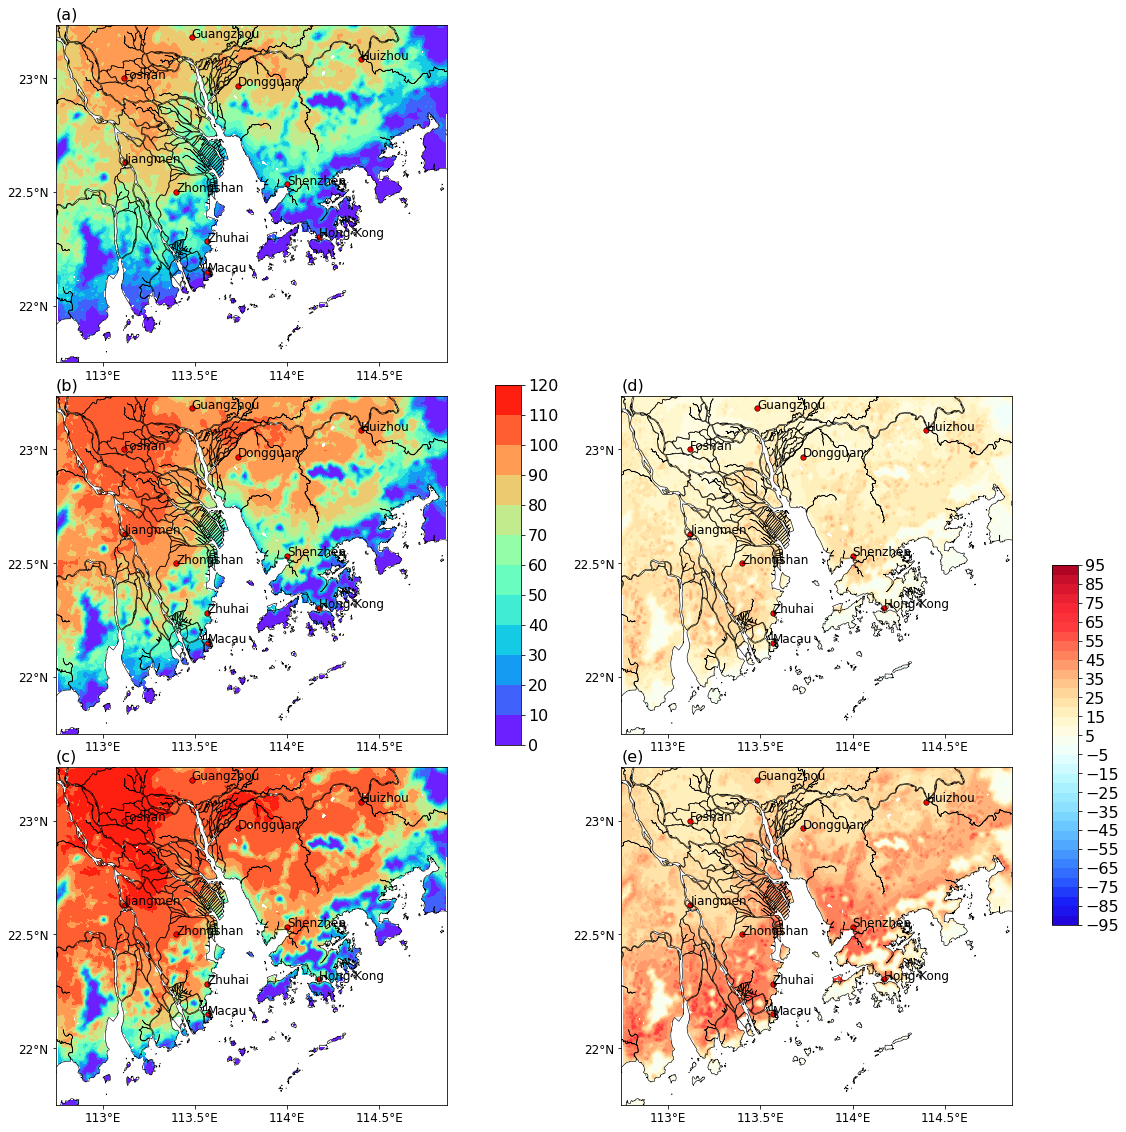

In [47]:

plt.rcParams["font.family"] = "DejaVu Sans"
font={'weight':'medium',
      'color':'black',
      'size':12}

fig,ax=plt.subplots(3,2,figsize=(18,25))
axes = ax.flatten()

ax1=axes[0]
ax2=axes[1].axis('off')
ax3=axes[2]
ax4=axes[3]
ax5=axes[4]
ax6=axes[5]

ax1 = PRD.geometry.plot(ax=ax1,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax3 = PRD.geometry.plot(ax=ax3,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax4 = PRD.geometry.plot(ax=ax4,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax5 = PRD.geometry.plot(ax=ax5,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax6 = PRD.geometry.plot(ax=ax6,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')

C11 = ax1.contourf(ds_ssp245_2010s.XLONG,ds_ssp245_2010s.XLAT,ds_ssp245_2010s.ssp245_HDF_1120,np.arange(0, 130, 10),\
                   cmap="rainbow")
C31 = ax3.contourf(ds_ssp245_2040s.XLONG,ds_ssp245_2040s.XLAT,ds_ssp245_2040s.ssp245_HDF_4049,np.arange(0, 130, 10),\
                   cmap="rainbow")
C51 = ax5.contourf(ds_ssp245_2090s.XLONG,ds_ssp245_2090s.XLAT,ds_ssp245_2090s.ssp245_HDF_9099,np.arange(0, 130, 10),\
                   cmap="rainbow")
C41 = ax4.contourf(ds_diff_ssp245_2040s.XLONG,ds_diff_ssp245_2040s.XLAT,ds_diff_ssp245_2040s.diff_ssp245_HDF_4049,\
                   np.arange(-95, 100, 5),cmap=BlueDarkRed18_18.mpl_colormap)
C61 = ax6.contourf(ds_diff_ssp245_2090s.XLONG,ds_diff_ssp245_2090s.XLAT,ds_diff_ssp245_2090s.diff_ssp245_HDF_9099,\
                   np.arange(-95, 100, 5),cmap=BlueDarkRed18_18.mpl_colormap)
###############################################################marker
obs_gd = pd.read_csv('/home/zzuoaa/evaluation_CMIP6/May/city_name.csv')

station_name = obs_gd.city

sc1 = ax1.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc2 = ax3.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc3 = ax4.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc4 = ax5.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc5 = ax6.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)



for i in range(len(obs_gd.lon)):
    ax1.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax3.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax4.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax5.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax6.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
###############################################################marker

fig.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.2, 
                    hspace=0.1)

position_1 = fig.add_axes([0.47, 0.4, 0.02, 0.2])
cb_1 = fig.colorbar(C11, cax=position_1,fraction=0.05)
cb_1.set_label('',fontdict=font)
cb_1.set_ticks(np.arange(0, 130, 10))
cb_1.ax.tick_params(labelsize=16) 

position_2 = fig.add_axes([0.90, 0.3, 0.02, 0.2])
cb_2 = fig.colorbar(C41, cax=position_2,fraction=0.05)
cb_2.set_label('',fontdict=font)
cb_2.set_ticks(np.arange(-95, 100, 10))
cb_2.ax.tick_params(labelsize=16) 



ax1.set_xlim([112.74554443, 114.86462402])
ax1.set_ylim([21.75164032, 23.23461723])
ax1.set_xticks([113,113.5,114,114.5])
ax1.set_yticks([22,22.5,23])
ax1.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax1.set_yticklabels([22,22.5,23], fontdict=font)
ax1.xaxis.set_major_formatter(LongitudeFormatter())                      
ax1.yaxis.set_major_formatter(LatitudeFormatter())                       

ax3.set_xlim([112.74554443, 114.86462402])
ax3.set_ylim([21.75164032, 23.23461723])
ax3.set_xticks([113,113.5,114,114.5])
ax3.set_yticks([22,22.5,23])
ax3.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax3.set_yticklabels([22,22.5,23], fontdict=font)
ax3.xaxis.set_major_formatter(LongitudeFormatter())                     
ax3.yaxis.set_major_formatter(LatitudeFormatter())   

ax5.set_xlim([112.74554443, 114.86462402])
ax5.set_ylim([21.75164032, 23.23461723])
ax5.set_xticks([113,113.5,114,114.5])
ax5.set_yticks([22,22.5,23])
ax5.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax5.set_yticklabels([22,22.5,23], fontdict=font)
ax5.xaxis.set_major_formatter(LongitudeFormatter())                      
ax5.yaxis.set_major_formatter(LatitudeFormatter())   

ax4.set_xlim([112.74554443, 114.86462402])
ax4.set_ylim([21.75164032, 23.23461723])
ax4.set_xticks([113,113.5,114,114.5])
ax4.set_yticks([22,22.5,23])
ax4.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax4.set_yticklabels([22,22.5,23], fontdict=font)
ax4.xaxis.set_major_formatter(LongitudeFormatter())                     
ax4.yaxis.set_major_formatter(LatitudeFormatter())   

ax6.set_xlim([112.74554443, 114.86462402])
ax6.set_ylim([21.75164032, 23.23461723])
ax6.set_xticks([113,113.5,114,114.5])
ax6.set_yticks([22,22.5,23])
ax6.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax6.set_yticklabels([22,22.5,23], fontdict=font)
ax6.xaxis.set_major_formatter(LongitudeFormatter())                      
ax6.yaxis.set_major_formatter(LatitudeFormatter())   

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300 

ax1.set_title('(a)', fontsize=16, color='black',loc='left')
ax3.set_title('(b)', fontsize=16, color='black',loc='left')
ax5.set_title('(c)', fontsize=16, color='black',loc='left')
ax4.set_title('(d)', fontsize=16, color='black',loc='left')
ax6.set_title('(e)', fontsize=16, color='black',loc='left')

plt.show()
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/script/fig4_hw_metrics/pics/fig6_HDF.eps',bbox_inches='tight',dpi=300,format='eps',transparent=True)
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/script/fig4_hw_metrics/pics/fig6_HDF.pdf',bbox_inches='tight',dpi=300)
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/script/fig4_hw_metrics/pics/fig6_HDF.png',bbox_inches='tight',dpi=300)